In [108]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split

In [109]:
features_num = 1
num = 220

In [110]:
Train_dataset = np.loadtxt('trainset(2)/J0003_0024_0222_20110307012737_cell_7.csv',delimiter=",", skiprows=1)
Test_dataset = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_03.csv',delimiter=",", skiprows=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Train_dataset = scaler.fit_transform(Train_dataset)
Test_dataset = scaler.fit_transform(Test_dataset)
print(Train_dataset)

X_train = Train_dataset[:, 0:features_num]
Y_train = Train_dataset[:, 0]



[[0.         0.         0.        ]
 [0.00291545 0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.00291545 0.         0.        ]
 [0.00291545 0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.00874636 0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.00874636 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.00874636 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01457726 0.         0.        ]
 [0.01749271 0.         0.        ]
 [0.02332362 0.         0.        ]
 [0.02332362 0.         0.        ]
 [0.02332362 0.         0.        ]
 [0.02623907 0.         0.        ]
 [0.02040816 0.         0.  

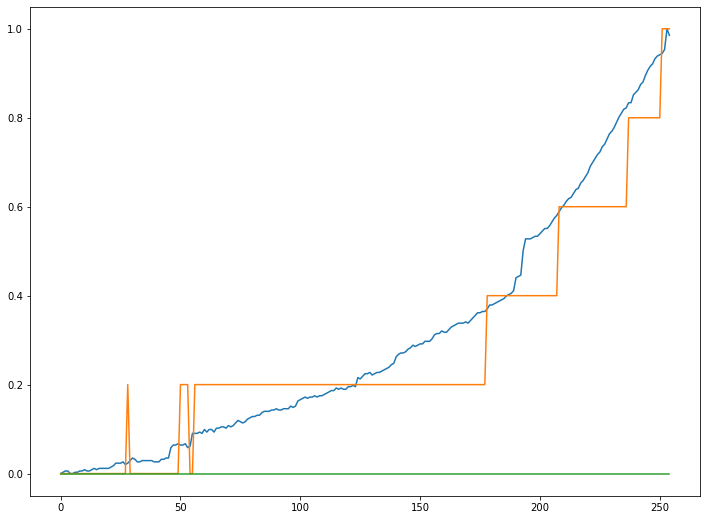

In [111]:
X_test = Train_dataset[num:250, 0:features_num]
Y_test = Train_dataset[num:250, 0]
r_x_test = Test_dataset[:,0:features_num]
r_y_test = Test_dataset[:,0]
plt.figure(figsize=(12, 9))
plt.plot(Train_dataset)

In [112]:
def make_dataset(data, label, window_size=40):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data[i:i+window_size]))
        label_list.append(np.array(label[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [113]:
train_feature, train_label = make_dataset(X_train, Y_train, 40)

In [114]:
test_feature, test_label = make_dataset(r_x_test, r_y_test, 40)

test_feature.shape, test_label.shape
print(test_feature.shape, test_label.shape)

(218, 40, 1) (218,)


In [115]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
print(x_train.shape, x_valid.shape)

(172, 40, 1) (43, 40, 1)


In [124]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(32,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=False)
          )
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(1))

In [125]:
model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(lr=0.01),
                metrics=[tf.metrics.MeanAbsoluteError()])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500, mode='min')
filename = os.path.join('models/', 'tmp_checkpointcell7_GRU_onefeature.h5')
checkpoint = tf.keras.callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [126]:
history = model.fit(x_train, y_train,
                                    epochs=50,
                                    batch_size=1, steps_per_epoch=200,
                                    validation_data=(x_valid, y_valid),
                                    callbacks=[checkpoint])

Epoch 1/50
200/200 [==============================] - 2s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0453 - val_loss: 6.3611e-04 - val_mean_absolute_error: 0.0235

Epoch 00001: val_loss improved from inf to 0.00064, saving model to models\tmp_checkpointcell7_GRU_onefeature.h5
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0010 - mean_absolute_error: 0.0244 - val_loss: 2.2949e-04 - val_mean_absolute_error: 0.0092

Epoch 00002: val_loss improved from 0.00064 to 0.00023, saving model to models\tmp_checkpointcell7_GRU_onefeature.h5
Epoch 3/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0025 - mean_absolute_error: 0.0388 - val_loss: 2.5723e-04 - val_mean_absolute_error: 0.0113

Epoch 00003: val_loss did not improve from 0.00023
Epoch 4/50
200/200 [==============================] - 1s 5ms/step - loss: 7.9571e-04 - mean_absolute_error: 0.0181 - val_loss: 2.0957e-04 - val_mean_absolute_error: 0.0103

Epoch 00004: val_loss improved from 0.0


Epoch 00035: val_loss did not improve from 0.00006
Epoch 36/50
200/200 [==============================] - 1s 5ms/step - loss: 2.5376e-04 - mean_absolute_error: 0.0119 - val_loss: 2.2938e-04 - val_mean_absolute_error: 0.0131

Epoch 00036: val_loss did not improve from 0.00006
Epoch 37/50
200/200 [==============================] - 1s 5ms/step - loss: 2.4690e-04 - mean_absolute_error: 0.0120 - val_loss: 3.2024e-04 - val_mean_absolute_error: 0.0150

Epoch 00037: val_loss did not improve from 0.00006
Epoch 38/50
200/200 [==============================] - 1s 5ms/step - loss: 2.2283e-04 - mean_absolute_error: 0.0112 - val_loss: 4.2045e-04 - val_mean_absolute_error: 0.0199

Epoch 00038: val_loss did not improve from 0.00006
Epoch 39/50
200/200 [==============================] - 1s 5ms/step - loss: 5.1978e-04 - mean_absolute_error: 0.0168 - val_loss: 6.6053e-05 - val_mean_absolute_error: 0.0052

Epoch 00039: val_loss did not improve from 0.00006
Epoch 40/50
200/200 [===========================

In [127]:
model.load_weights(filename)
pred = model(test_feature)
print(pred)

tf.Tensor(
[[0.15915814]
 [0.18391658]
 [0.25775802]
 [0.21194409]
 [0.19874904]
 [0.16173257]
 [0.18469396]
 [0.29249096]
 [0.2882567 ]
 [0.32083422]
 [0.33066773]
 [0.33389232]
 [0.33501872]
 [0.33543396]
 [0.33559448]
 [0.3356591 ]
 [0.40155232]
 [0.38947293]
 [0.41823065]
 [0.39552838]
 [0.45261937]
 [0.5023875 ]
 [0.5192112 ]
 [0.5255032 ]
 [0.4666019 ]
 [0.4454124 ]
 [0.43774754]
 [0.46657503]
 [0.47601748]
 [0.4167348 ]
 [0.4279489 ]
 [0.39946634]
 [0.45408905]
 [0.43988395]
 [0.46701705]
 [0.50744206]
 [0.4902882 ]
 [0.51568794]
 [0.5552474 ]
 [0.50846326]
 [0.5224828 ]
 [0.52722764]
 [0.5289386 ]
 [0.56019926]
 [0.54098153]
 [0.5646506 ]
 [0.51262593]
 [0.55497456]
 [0.5694328 ]
 [0.6049263 ]
 [0.64759964]
 [0.6635849 ]
 [0.6701499 ]
 [0.6441493 ]
 [0.66332394]
 [0.6705426 ]
 [0.64458734]
 [0.63447434]
 [0.6304081 ]
 [0.6286968 ]
 [0.5985815 ]
 [0.5274401 ]
 [0.53030336]
 [0.53067625]
 [0.5610943 ]
 [0.6019402 ]
 [0.616717  ]
 [0.59299254]
 [0.61407334]
 [0.5922213 ]
 [0.67347

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_12 (GRU)                 (None, 32)                3360      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 4,449
Trainable params: 4,449
Non-trainable params: 0
_________________________________________________________________
(218, 1)


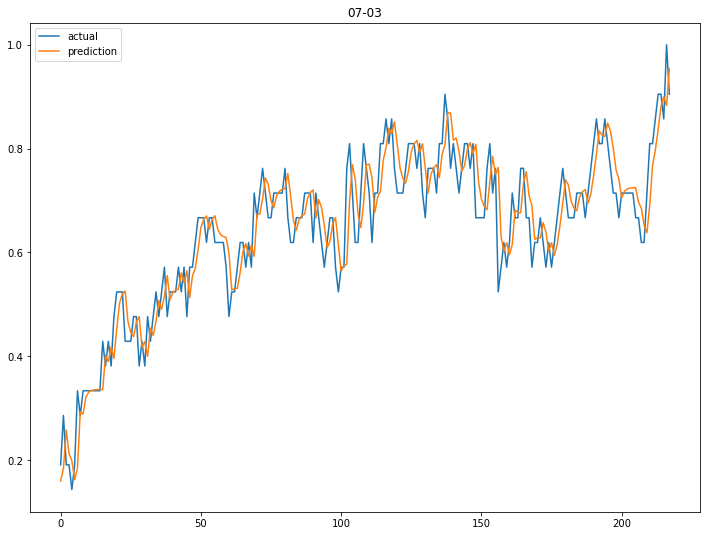

In [128]:
model.summary()
print(pred.shape)

plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.title('07-03')
plt.savefig('savefig/cell7/07-03.png')
plt.legend()
plt.show()

In [129]:
loop = len(test_label)
for i in range(loop):
    error_avg = 0
    error = abs((test_label[i] - pred[i])/test_label[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

tf.Tensor([0.02499515], shape=(1,), dtype=float32)


In [ ]:
test_ds2 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_23.csv',delimiter=",", skiprows=1)

test_ds2 = scaler.fit_transform(test_ds2)
x_test2 = test_ds2[:, 1:2]
y_test2 = test_ds2[:, 1]

In [ ]:
test_feature2, test_label2 = make_dataset(x_test2, y_test2, 40)

In [ ]:
pred2 = model.predict(test_feature2)

plt.figure(figsize=(12, 9))
plt.plot(test_label2, label='actual')
plt.plot(pred2, label='prediction')
plt.title('07-23')
plt.savefig('savefig/cell7/07-23.png')
plt.legend()
plt.show()
loop = len(test_label2)
for i in range(loop):
    error_avg = 0
    error = abs((test_label2[i] - pred2[i])/test_label2[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [ ]:
test_ds3 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_06.csv',delimiter=",", skiprows=1)
test_ds3 = scaler.fit_transform(test_ds3)
x_test3 = test_ds3[:, 1:2]
y_test3 = test_ds3[:, 1]
print(x_test3.shape, y_test3.shape)
test_feature3, test_label3 = make_dataset(x_test3, y_test3, 40)

pred3 = model.predict(test_feature3)

loop = len(test_label3)
for i in range(loop):
    error_avg = 0
    error = abs((test_label3[i] - pred3[i])/test_label3[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label3, label='actual')
plt.plot(pred3, label='prediction')
plt.title('07-06')
plt.savefig('savefig/cell7/07-06.png')
plt.legend()
plt.show()


In [ ]:
test_ds4 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_7.csv',delimiter=",", skiprows=1)
test_ds4 = scaler.fit_transform(test_ds4)
x_test4 = test_ds4[:, 1:2]
y_test4 = test_ds4[:, 1]
test_feature4, test_label4 = make_dataset(x_test4, y_test4, 40)

pred4 = model.predict(test_feature4)
loop = len(test_label4)
for i in range(loop):
    error_avg = 0
    error = abs((test_label4[i] - pred4[i])/test_label4[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label4, label='actual')
plt.plot(pred4, label='prediction')
plt.title('07-07')
plt.savefig('savefig/cell7/07-07.png')
plt.legend()
plt.show()

In [ ]:
test_ds5 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_9.csv',delimiter=",", skiprows=1)
test_ds5 = scaler.fit_transform(test_ds5)
x_test5 = test_ds5[:, 1:2]
y_test5 = test_ds5[:, 1]
test_feature5, test_label5 = make_dataset(x_test5, y_test5, 40)

pred5 = model.predict(test_feature5)

loop = len(test_label5)
for i in range(loop):
    error_avg = 0
    if test_label5[i]!=0:
        error = abs((test_label5[i] - pred5[i])/test_label5[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label5, label='actual')
plt.plot(pred5, label='prediction')
plt.title('07-09')
plt.savefig('savefig/cell7/07-09.png')
plt.legend()
plt.show()

In [ ]:
test_ds6 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_18.csv',delimiter=",", skiprows=1)
test_ds6 = scaler.fit_transform(test_ds6)
x_test6 = test_ds6[:, 1:2]
y_test6 = test_ds6[:, 1]
test_feature6, test_label6 = make_dataset(x_test6, y_test6, 40)

pred6 = model.predict(test_feature6)

loop = len(test_label6)
for i in range(loop):
    error_avg = 0
    error = abs((test_label6[i] - pred6[i])/test_label6[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label6, label='actual')
plt.plot(pred6, label='prediction')
plt.title('07-18')
plt.savefig('savefig/cell7/07-18.png')
plt.legend()
plt.show()

In [ ]:
test_ds7 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_19.csv',delimiter=",", skiprows=1)
test_ds7 = scaler.fit_transform(test_ds7)
x_test7 = test_ds7[:, 1:2]
y_test7 = test_ds7[:, 1]
test_feature7, test_label7 = make_dataset(x_test7, y_test7, 40)

pred7 = model.predict(test_feature7)

loop = len(test_label7)
for i in range(loop):
    error_avg = 0
    if test_label7[i]!=0:
        error = abs((test_label7[i] - pred7[i])/test_label7[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label7, label='actual')
plt.plot(pred7, label='prediction')
plt.title('07-19')
plt.savefig('savefig/cell7/07-19.png')
plt.legend()
plt.show()

In [ ]:
test_ds7 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_20.csv',delimiter=",", skiprows=1)
test_ds7 = scaler.fit_transform(test_ds7)
x_test7 = test_ds7[:, 1:2]
y_test7 = test_ds7[:, 1]
test_feature7, test_label7 = make_dataset(x_test7, y_test7,40)

pred7 = model.predict(test_feature7)

loop = len(test_label7)
for i in range(loop):
    error_avg = 0
    if test_label7[i]!=0:
        error = abs((test_label7[i] - pred7[i])/test_label7[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label7, label='actual')
plt.plot(pred7, label='prediction')
plt.title('07-20')
plt.savefig('savefig/cell7/07-20.png')
plt.legend()
plt.show()

In [ ]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_22.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 40)

pred8 = model.predict(test_feature8)

loop = len(test_label8)
for i in range(loop):
    error_avg = 0
    if test_label8[i]!=0:
        error = abs((test_label8[i] - pred8[i])/test_label8[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label8, label='actual')
plt.plot(pred8, label='prediction')
plt.title('07-22')
plt.savefig('savefig/cell7/07-22.png')
plt.legend()
plt.show()

In [ ]:
print(pred8.shape)
print(test_feature8.shape)

In [ ]:
def predict_next_timestamp(model, history):
    """Predict the next time stamp given a sequence of history data"""

    prediction = model.predict(history)
    prediction = np.reshape(prediction, (prediction.size,))
    return prediction

In [ ]:
xhat = test_feature8[0]
xxhat = np.array([xhat])
print(xxhat.shape)
tttest=model.predict(xxhat)

In [ ]:
testpred = np.zeros((300,1))
testpred.shape


In [ ]:

for i in range(300):
    expred = model.predict(np.array([xhat]))
    testpred[i] = expred
    xhat = np.vstack([xhat[1:],expred])

print(testpred.shape)
'''
i=0
expred = model.predict(np.array([xhat]))
testpred[i] = expred
xhat = np.vstack([xhat[1:],expred])

testpred.shape'''
'''
xhat = test_feature8
test1 = np.zeros((20,10,1))
print(test1.shape, xhat.shape)
testfe = np.concatenate((xhat,test1), axis=0)
testfe.shape'''

In [ ]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_22.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 40)
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 40)

for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    x_test8 = x_test8[1:]
    y_test8 = y_test8[1:]
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 40)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



In [ ]:
ac_test_label8 = ac_test_label8[100:]

plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.legend()
plt.show()

In [ ]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_22.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 40)
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 40)

for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 40)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.legend()
plt.show()

In [ ]:
expred = model.predict(test_feature8)
expred2 = np.zeros((1,1))
exprediction = np.append(expred2, expred)
expred = model.predict(exprediction)

exprediction.shape

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(test_label8, label='actual')
plt.plot(exprediction, label='prediction')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(test_label8, label='actual')
plt.plot(pred8, label='prediction')
plt.legend()
plt.show()

In [ ]:
zerotest = np.zeros((300,10,1))
zerotest = test_feature8
zerotest.shape